In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from utils.data_utils import get_and_assign_country

In [2]:
df_fraud = pd.read_csv('data/Candidate_tech_evaluation_candidate_copy_data science_fraud.csv', index_col=0)
df_ip_to_c = pd.read_excel('data/Candidate_tech_evaluation_candidate_copy_datascience_IpAddress_to_Country.xlsx')

In [3]:
#inspect
df_fraud.head(10)

user_id      signup_time     purchase_time  purchase_value  \
149671   285108   7/15/2015 4:36   9/10/2015 14:17              31   
15611    131009  1/24/2015 12:29    4/13/2015 4:53              31   
73178    328855   3/11/2015 0:54    4/5/2015 12:23              16   
84546    229053   1/7/2015 13:19    1/9/2015 10:12              29   
35978    108439   2/8/2015 21:11    4/9/2015 14:26              26   
103053   178528  4/20/2015 20:19    8/3/2015 20:17              35   
71773    323775   6/30/2015 7:34    9/5/2015 16:59              28   
143439    69189   3/10/2015 1:53   6/30/2015 17:37              21   
101025    70424   7/5/2015 16:54   8/25/2015 16:08              43   
63154    328496  7/23/2015 12:48  10/20/2015 13:01              40   

            device_id  source  browser sex  age    ip_address  class  
149671  HZAKVUFTDOSFD  Direct   Chrome   M   49  2.818400e+09      0  
15611   XGQAJSOUJIZCC     SEO       IE   F   21  3.251268e+09      0  
73178   VCCTAYDCWKZIY  Direct       IE   M   26  2.727760e+09      0  
84546   MFFIHYNXCJLEY     SEO   Chrome   M   34  2.083420e+09      0  
35978   WMSXWGVPNIFBM     Ads  FireFox   M   33  3.207913e+09      0  
103053  HUFZWLDYJPRCK     SEO   Chrome   F   30  2.550204e+09      0  
71773   DLOOEWQCUQRKZ     SEO   Safari   M   47  4.075994e+09      0  
143439  NRJPZDBHXNQJG     SEO  FireFox   F   47  2.753449e+09      0  
101025  YDLNPVEWMTMMZ  Direct       IE   M   40  3.310808e+09      0  
63154   HTOCRWCBYIQJI     Ads   Safari   M   33  2.185371e+09      0

In [4]:
df_fraud.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [5]:
df_ip_to_c.head(10)

lower_bound_ip_address  upper_bound_ip_address    country
0                16777216                16777471  Australia
1                16777472                16777727      China
2                16777728                16778239      China
3                16778240                16779263  Australia
4                16779264                16781311      China
5                16781312                16785407      Japan
6                16785408                16793599      China
7                16793600                16809983      Japan
8                16809984                16842751   Thailand
9                16842752                16843007      China

In [6]:
df_ip_to_c.dtypes

lower_bound_ip_address     int64
upper_bound_ip_address     int64
country                   object
dtype: object

In [7]:
#ip address to be converted to int for join 
df_fraud['ip_address'] = df_fraud['ip_address'].astype(int)

In [8]:
#will take some time to match country
df_fraud, df_ip = get_and_assign_country(df_fraud, df_ip_to_c)

In [9]:
#check class count. approx 9.4% of transactions are fraudulent 
df_fraud.groupby('class').count()

user_id  signup_time  purchase_time  purchase_value  device_id  source  \
class                                                                           
0       108735       108735         108735          108735     108735  108735   
1        11265        11265          11265           11265      11265   11265   

       browser     sex     age  ip_address  country  
class                                                
0       108735  108735  108735      108735   108735  
1        11265   11265   11265       11265    11265

# 1) fraud statistics per country

In [10]:
#generate statistics
df_fraud_per_country = df_fraud[['country', 'class']].groupby('country').sum().reset_index().rename(columns = {'class':'n_fraud'})
df_n_country = df_fraud[['country', 'class']].groupby('country').count().reset_index().rename(columns = {'class':'n_country'})
df_per_country = df_n_country.merge(df_fraud_per_country, on = 'country', how = 'left')
df_per_country['perc_fraud_per_country'] =  df_per_country['n_fraud']/df_per_country['n_country']
df_per_country.head(10)

country  n_country  n_fraud  perc_fraud_per_country
0          Afghanistan          5        1                0.200000
1              Albania         10        0                0.000000
2              Algeria         98       10                0.102041
3               Angola         19        1                0.052632
4  Antigua_and_Barbuda          2        0                0.000000
5            Argentina        513       56                0.109162
6              Armenia         12        2                0.166667
7            Australia       1491      135                0.090543
8              Austria        349       26                0.074499
9           Azerbaijan         21        2                0.095238

In [11]:
#177 countries, highly imbalanced (half of all countries with less than 23 records, 30-40% of all countries with 0 fraud cases)
df_per_country.describe([0.1*i for i in range(10)]).T

count        mean          std  min   0%  10%  20%  \
n_country               177.0  677.966102  3802.744635  1.0  1.0  2.0  4.0   
n_fraud                 177.0   63.644068   361.976303  0.0  0.0  0.0  0.0   
perc_fraud_per_country  177.0    0.073602     0.109968  0.0  0.0  0.0  0.0   

                        30%        40%        50%        60%         70%  \
n_country               6.0  13.000000  23.000000  57.800000  133.200000   
n_fraud                 0.0   1.000000   1.000000   3.000000   13.000000   
perc_fraud_per_country  0.0   0.012615   0.055556   0.073649    0.088922   

                               80%         90%      max  
n_country               308.000000  842.000000  46184.0  
n_fraud                  31.000000   70.000000   4472.0  
perc_fraud_per_country    0.110721    0.166667      1.0

In [12]:
#already think about how to turn into features, need enough positive cases to have useful feature -> look at 30 larged countries only (assign remaining to 'Other' category)
larges_countries = df_per_country.sort_values('n_country', ascending = False).country[:30].values

In [13]:
df_per_country[df_per_country.country.isin(larges_countries)].sort_values('perc_fraud_per_country', ascending = False)

country  n_country  n_fraud  perc_fraud_per_country
45                        Denmark        381       62                0.162730
121                        Norway        480       62                0.129167
153                        Sweden        842      107                0.127078
105                        Mexico        919      113                0.122960
74                          India       1014      117                0.115385
30                         Canada       2344      270                0.115188
5                       Argentina        513       56                0.109162
166                United_Kingdom       3580      372                0.103911
167                 United_States      46184     4472                0.096830
82                          Japan       5735      554                0.096600
148                  South_Africa        655       62                0.094656
58                         France       2489      233                0.093612
23                         Brazil       2353      218                0.092648
86              Korea_Republic_of       3341      306                0.091589
7                       Australia       1491      135                0.090543
75                      Indonesia        520       46                0.088462
34                          China       9532      817                0.085711
123                         Other      17418     1483                0.085142
80                          Italy       1564      133                0.085038
156  Taiwan_Republic_of_China_ROC        967       82                0.084798
154                   Switzerland        639       52                0.081377
137            Russian_Federation       1281      100                0.078064
116                   Netherlands       1325      100                0.075472
62                        Germany       2890      211                0.073010
161                        Turkey        456       33                0.072368
150                         Spain        842       59                0.070071
35                       Colombia        471       33                0.070064
172                      Viet_Nam        431       27                0.062645
136                       Romania        415       23                0.055422
131                        Poland        586       31                0.052901

# 2) fraud statistics - gender

In [14]:
#relative value of fraud per gender
df_fraud[['sex', 'class']].groupby('sex').sum()/df_fraud[['sex', 'class']].groupby('sex').count()
#Note: generally should be cautious with such variables and aware of discriminatory bias 

class
sex          
F    0.091671
M    0.095442

# 3) age analysis

/Users/marcomenner/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marcomenner/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marcomenner/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='class', ylabel='age'>

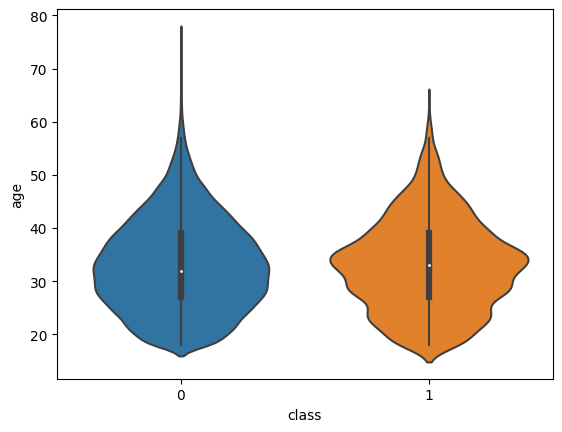

In [15]:
sns.violinplot(x='class', y='age', data=df_fraud[df_fraud.sex == 'F'])

/Users/marcomenner/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marcomenner/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marcomenner/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='class', ylabel='age'>

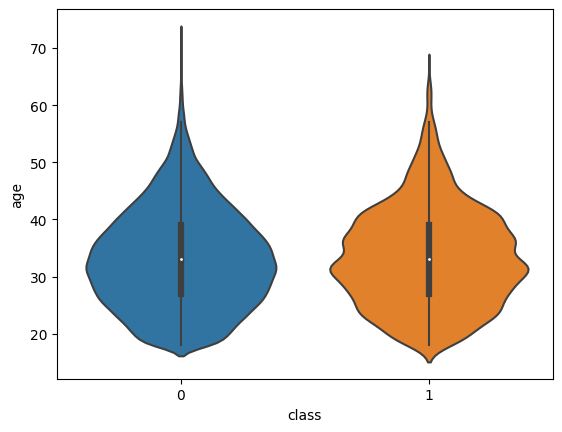

In [16]:
sns.violinplot(x='class', y='age', data=df_fraud[df_fraud.sex == 'M'])

In [17]:
#age may be a (however quite weak) indicator depending on gender(female around 35 and men around early 30s)

# 4) browser and source

In [18]:
df_fraud[['browser', 'class']].groupby('browser').sum()/df_fraud[['browser', 'class']].groupby('browser').count()


class
browser          
Chrome   0.099441
FireFox  0.094112
IE       0.086107
Opera    0.091429
Safari   0.091743

In [19]:
df_fraud[['source', 'class']].groupby('source').sum()/df_fraud[['source', 'class']].groupby('source').count()

class
source          
Ads     0.091696
Direct  0.105643
SEO     0.090109

In [20]:
#browser and source seem not have a too large impact on fraud but may have in combination with other features

# 5) time stamps and purchasing times

In [21]:
df_fraud['purchase_time'] = pd.to_datetime(df_fraud['purchase_time']) 
df_fraud['signup_time'] = pd.to_datetime(df_fraud['signup_time'])
#generate the feature seconds_to_purchase, so the amount of seconds passed from signup to purchase
df_fraud['seconds_to_purchase'] = (df_fraud['purchase_time'] - df_fraud['signup_time']).dt.seconds

In [22]:
#more than 5% of records have a value of 0, which may indicate some automated setup / bots
df_fraud['seconds_to_purchase'].describe([0.05*i for i in range(20)])


count    120000.00000
mean      40934.85850
std       26046.67199
min           0.00000
0%            0.00000
5%            0.00000
10%        4440.00000
15%        8940.00000
20%       13500.00000
25%       18060.00000
30%       22620.00000
35%       27180.00000
40%       31800.00000
45%       36300.00000
50%       40860.00000
55%       45420.00000
60%       49860.00000
65%       54420.00000
70%       58980.00000
75%       63480.00000
80%       67980.00000
85%       72600.00000
90%       77220.00000
95%       81720.00000
max       86340.00000
Name: seconds_to_purchase, dtype: float64

In [23]:
#indeed, for close to zero time passed from signup to shopping (beyond human skills), the fraud rate seems very high. This may be a very good feature
df_fraud[df_fraud['seconds_to_purchase']<=10]['class'].mean()

0.9891720806263535

In [24]:
#for the rest correlation seems very low (time in log scale) -> use a binary feature later, may not need the pure seconds_to_purchase
df_time_passed = df_fraud[df_fraud['seconds_to_purchase']>10]
np.corrcoef(np.log(df_time_passed.seconds_to_purchase+1),df_time_passed['class'])

array([[ 1.        , -0.02359467],
       [-0.02359467,  1.        ]])

# 6) device_id and ip_address

In [25]:
#there seem to be some duplication for device_id and ip_address, but user_id is unique. 
# Idea: may be able to determine if new users have used a known device_id / ip_address which was involved in a fraudulant transaction in the past
df_fraud['user_id'].drop_duplicates().count(), df_fraud['device_id'].drop_duplicates().count(), df_fraud['ip_address'].drop_duplicates().count()

(120000, 110599, 114134)

In [26]:
#check the duplicates
df_ip_count = df_fraud[['ip_address', 'user_id']].groupby('ip_address').count().reset_index()
ip_duplicates = df_ip_count[df_ip_count.user_id>1].ip_address.values

#mode than 90% of transactions where a duplicate is appearing are fraudulent
df_fraud[df_fraud.ip_address.isin(ip_duplicates)]['class'].mean()

0.9132075471698113

In [27]:
#indeed when looking at unique ip_addresses, the percentage goes down significantly (from 9.4% to 5.2% -> many fraud cases with repeating ip_addresses)
#could think of reducing the space to unique ip_addresses for training, but on the other hand this provides a natural way of oversampling and counters class impbalance
#Thus include the duplicated ip_addresses later in the modeling
df_fraud[['ip_address','class']].groupby('ip_address').max().mean()

class    0.052333
dtype: float64

In [28]:
#the other way round, for all non-fraudulent ip addresses there is mostly only one user (with rare exceptions)
fraud_ip_addresses = df_fraud[df_fraud['class']==1].ip_address.values
df_ip_count[~df_ip_count.ip_address.isin(fraud_ip_addresses)].user_id.describe([0.05*i for i in range(20)])


count    108161.000000
mean          1.000009
std           0.003041
min           1.000000
0%            1.000000
5%            1.000000
10%           1.000000
15%           1.000000
20%           1.000000
25%           1.000000
30%           1.000000
35%           1.000000
40%           1.000000
45%           1.000000
50%           1.000000
55%           1.000000
60%           1.000000
65%           1.000000
70%           1.000000
75%           1.000000
80%           1.000000
85%           1.000000
90%           1.000000
95%           1.000000
max           2.000000
Name: user_id, dtype: float64

In [29]:
#check the duplicates now for devide_id
df_device_count = df_fraud[['device_id', 'user_id']].groupby('device_id').count().reset_index()
device_duplicates = df_device_count[df_device_count.user_id>1].device_id.values

#mode than 50% of transactions where a duplicate is involved are fraudulent, but much less compared to ip_address
df_fraud[df_fraud.device_id.isin(device_duplicates)]['class'].mean()


0.5644924342588512

In [30]:
#In almost all cases where there is device duplication there is also ip address duplication
#Thus only focus on ip_address and not on device_id, since no additional information gain seems to come from device_id info
len(np.intersect1d(np.unique(df_fraud[df_fraud.device_id.isin(device_duplicates)].ip_address.values),ip_duplicates))/len(ip_duplicates)

0.9986824769433466